## Занятие 4. Факторный анализ

*Выполнил:* Бронников Егор ПМ-1901

*Последнее изменение:* 1/11/2021

## Импорты

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

## Данные

*Источник:* http://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey#

*Название:* **Somerville Happiness Survey Data Set**

### Описание данных

Опрос жителей об уровне счатья в каком-то городе

### Описание полей

1. **decision** — атрибут решения со значениями 0 (не счастлив) и 1 (счастлив);
1. **availability of information** — доступность информации о городских службах;
1. **cost of housing** — стоимость жилья;
1. **quality of public schools** — общее качество государственных школ;
1. **trust in police** — ваше доверие к местной полиции;
1. **sidewalks** — содержание улиц и тротуаров;
1. **events** — доступность общественных мероприятий.

In [5]:
filename = 'SomervilleHappinessSurvey2015.xlsx'
names = ['decision', 'availability of information', 'cost of housing', 'quality of public schools ', 'trust in police', 'sidewalks', 'events']
df = pd.read_excel(filename, names=names)

Смотрим на данные

In [6]:
df.head()

,decision,availability of information,cost of housing,quality of public schools,trust in police,sidewalks,events
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


Описываем данные

In [7]:
df.describe()

,decision,availability of information,cost of housing,quality of public schools,trust in police,sidewalks,events
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.538462,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783
std,0.500271,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Посмотрим на взаимосвязь между признаками

In [8]:
df.corr()

,decision,availability of information,cost of housing,quality of public schools,trust in police,sidewalks,events
decision,1.000000,0.312740,0.019368,0.163639,0.113356,0.206685,0.220729
availability of information,0.312740,1.000000,0.092676,0.301971,0.104378,0.399203,0.417521
cost of housing,0.019368,0.092676,1.000000,0.181081,0.107432,-0.002141,0.024546
quality of public schools,0.163639,0.301971,0.181081,1.000000,0.298898,0.329874,0.207006
trust in police,0.113356,0.104378,0.107432,0.298898,1.000000,0.269420,0.199151
sidewalks,0.206685,0.399203,-0.002141,0.329874,0.269420,1.000000,0.307402
events,0.220729,0.417521,0.024546,0.207006,0.199151,0.307402,1.000000


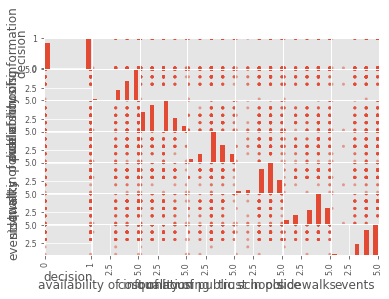

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(df);

Видим, что данные признаки далеки от нормальных, корреляции между признаками не наблюдается.

## Метод главных компонент

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Cтандартизируем переменные.

In [10]:
array = df.values

In [11]:
import math
from sklearn import preprocessing

def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    return scaled

In [12]:
df_scaled = preprocessing.scale(df)

Попробуем с помощью метода главных компонент спроецировать данные на трёхмерную плоскость. То есть выделим три главных компоненты. Реализация метода содержится в классе `PCA` библиотеки `sklearn.decomposition`.

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=3)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

[0.33385345 0.15829046 0.1331463 ]


Координаты самих компонент находятся в атрибуте ```components_```.

In [15]:
print(pca.components_)

[[-0.32890404 -0.47031892 -0.12594682 -0.41219218 -0.32081639 -0.45386708
  -0.41945056]
 [-0.30886416 -0.2424628   0.69012032  0.35885091  0.40945574 -0.09931786
  -0.25150875]
 [ 0.34524879  0.30208192  0.61894673 -0.10138153 -0.55885002 -0.28655259
   0.04184228]]


Смотрим на процент отклонения, объясняемый каждым из выбранных компонентов. 

In [16]:
print ('Explained variance by component: %s' % pca.explained_variance_ratio_)

Explained variance by component: [0.33385345 0.15829046 0.1331463 ]


In [17]:
pca.singular_values_

array([18.28079056, 12.58764292, 11.54467184])

Смотрим на процент отклонения, объясняемый каждым из выбранных компонентов. 

In [18]:
pca.explained_variance_ratio_

array([0.33385345, 0.15829046, 0.1331463 ])

Уменьшаем размерность

In [19]:
zzz = pca.transform(df_scaled)

In [20]:
zzz

array([[ 1.83832663e+00,  1.26882696e+00, -3.77645472e-01],
       [ 1.27997523e+00,  1.23322572e+00, -2.12210280e+00],
       [-5.37687240e-01, -8.07144457e-01,  1.49957515e+00],
       [ 9.04171396e-03,  4.31784545e-01,  1.36251406e+00],
       [ 9.04171396e-03,  4.31784545e-01,  1.36251406e+00],
       [-2.29350218e+00,  1.18047899e+00,  8.39783414e-01],
       [ 4.10436053e+00, -8.72281839e-01,  8.10596439e-02],
       [-1.83232556e+00,  5.49469500e-01,  1.06718144e+00],
       [ 2.52605414e-01, -8.74590417e-02, -1.72032378e+00],
       [-2.60158908e-01,  4.60132817e-01,  1.00405832e+00],
       [ 2.80972221e+00,  4.84332118e-01, -3.51334071e-01],
       [ 3.30234337e-01,  1.40783350e+00,  4.86395505e-02],
       [-2.37113110e+00, -3.14813552e-01, -9.29179916e-01],
       [ 2.73146694e-01,  1.29181578e+00, -1.84558583e+00],
       [ 1.52769787e+00, -6.15391190e-01, -1.03602604e+00],
       [ 4.32299368e-01, -2.45965937e-01, -2.20025295e-01],
       [-1.42192183e+00,  1.01218856e+00

## Факторный анализ


http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html
 

Попробуем с помощью факторного анализа построить новые фичи, которые были бы более удобными в использовании с минимальной потерей информации.

Используем класс ```FactorAnalysis``` из ```sklearn.decomposition```. 
Начнём с трёх факторов.

In [21]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=3)
fa.fit(df_scaled)

FactorAnalysis(n_components=3)

Координаты факторов в пространстве старых фич находятся в атрибуте ```components_```.

In [22]:
pd.DataFrame(fa.components_, columns=df.columns)

,decision,availability of information,cost of housing,quality of public schools,trust in police,sidewalks,events
0,-0.385431,-0.783636,-0.140971,-0.480654,-0.315979,-0.574220,-0.528196
1,-0.048497,-0.254858,0.239049,0.326225,0.496688,0.140898,-0.021708
2,-0.040786,0.083235,0.496033,0.068011,-0.123756,-0.214969,-0.099316


Видим, что второй (первый) фактор коррелирует с доверием к полиции. Третий же фактор, напротив, коррелирует с фичами, связанными со стоймостью жилья. То есть мы свели пространство из семи фич к трём новым интерпретируемым фичам.

Уникальность фич в смысле дисперсии, объяснённой факторами (чем больше, тем хуже объясняется факторами) содержится в атрибуте ```noise_variance_```.

In [23]:
print('Uniqueness:')
pd.Series(fa.noise_variance_, df.columns)

Uniqueness:


decision                       0.847143
availability of information    0.317136
cost of housing                0.680641
quality of public schools      0.657178
trust in police                0.638426
sidewalks                      0.603682
events                         0.710193
dtype: float64

Наконец, сами факторы (как новые векторы-фичи) можно получить, применив метод ```transform```.

In [25]:
scores = pd.DataFrame(fa.transform(df_scaled), columns=['factor1', 'factor2','factor3'])
scores.head()

,factor1,factor2,factor3
0,1.321555,0.713808,0.247716
1,1.064183,1.254895,-0.641089
2,-0.482558,-0.801789,0.446723
3,-0.324145,-0.572245,0.944895
4,-0.324145,-0.572245,0.944895


In [26]:
scores

,factor1,factor2,factor3
0,1.321555,0.713808,0.247716
1,1.064183,1.254895,-0.641089
2,-0.482558,-0.801789,0.446723
3,-0.324145,-0.572245,0.944895
4,-0.324145,-0.572245,0.944895
...,...,...,...
138,-0.039910,-1.678670,0.801463
139,-0.380047,-0.611424,0.076897
140,-0.788272,-0.222223,0.091827
141,0.086410,0.377272,-0.062625


Попробуем теперь построить не три, а четыре фактора.

In [27]:
fa = FactorAnalysis(n_components=4)
fa.fit(df_scaled)
pd.DataFrame(fa.components_, columns=df.columns)

,decision,availability of information,cost of housing,quality of public schools,trust in police,sidewalks,events
0,-0.382754,-0.727942,-0.136057,-0.509987,-0.365321,-0.610203,-0.553332
1,0.090341,0.295107,-0.176906,-0.289875,-0.500964,-0.099152,0.091845
2,-0.012097,0.098166,0.438577,0.156051,-0.092766,-0.210104,-0.108929
3,-0.046140,0.012418,-0.054415,0.129929,-0.134459,0.181054,-0.245506


Теперь у нас второй фактор (первый) коррелирует с доступностью к информации и третий (второй) фактор коррелирует со стоймостью аренды жилья.